# EDA

## Read Data

In [ ]:
import pandas as pd
file_path=r'data\idealista_bcn_sale_08_2025.csv'
df= pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   5000 non-null   int64  
 1   propertyCode            5000 non-null   int64  
 2   thumbnail               4967 non-null   object 
 3   externalReference       4372 non-null   object 
 4   numPhotos               5000 non-null   int64  
 5   floor                   3532 non-null   object 
 6   price                   5000 non-null   float64
 7   priceInfo               5000 non-null   object 
 8   propertyType            5000 non-null   object 
 9   operation               5000 non-null   object 
 10  size                    5000 non-null   float64
 11  exterior                3508 non-null   object 
 12  rooms                   5000 non-null   int64  
 13  bathrooms               5000 non-null   int64  
 14  address                 5000 non-null   

In [ ]:
columns=["propertyCode","floor","price",""]

In [2]:
print(df.isna().sum())

index                        0
propertyCode                 0
thumbnail                   33
externalReference          628
numPhotos                    0
floor                     1468
price                        0
priceInfo                    0
propertyType                 0
operation                    0
size                         0
exterior                  1492
rooms                        0
bathrooms                    0
address                      0
province                     0
municipality                 0
district                   953
country                      0
latitude                     0
longitude                    0
showAddress                  0
url                          0
description                 16
hasVideo                     0
status                      32
newDevelopment               0
hasLift                   1147
priceByArea                  0
change                       0
detailedType                 0
suggestedTexts               0
hasPlan 

In [3]:
threshold = len(df)*0.05
print(threshold)

250.0


In [4]:
cols_to_drop=df.columns[df.isna().sum()>= threshold]
print(cols_to_drop)

Index(['externalReference', 'floor', 'exterior', 'district', 'hasLift',
       'parkingSpace', 'highlight', 'neighborhood', 'newDevelopmentFinished'],
      dtype='object')


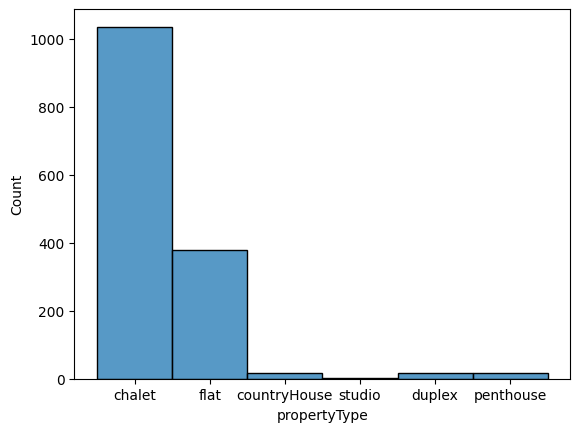

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
mask_floor=df["floor"].isna()
sns.histplot(data=df[mask_floor],x="propertyType")
plt.show()

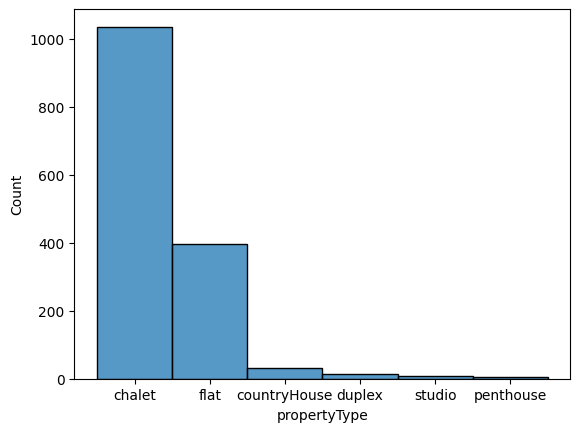

In [6]:
mask_exterior=df["exterior"].isna()
sns.histplot(data=df[mask_exterior],x="propertyType")
plt.show()

In [7]:
df_clean = df.copy()

mask = df_clean["propertyType"].isin(["chalet", "countryHouse", "penthouse"])

df_clean.loc[mask, "floor"]    = 0
df_clean.loc[mask, "exterior"] = 1

df_clean.isna().sum()

index                        0
propertyCode                 0
thumbnail                   33
externalReference          628
numPhotos                    0
floor                      398
price                        0
priceInfo                    0
propertyType                 0
operation                    0
size                         0
exterior                   419
rooms                        0
bathrooms                    0
address                      0
province                     0
municipality                 0
district                   953
country                      0
latitude                     0
longitude                    0
showAddress                  0
url                          0
description                 16
hasVideo                     0
status                      32
newDevelopment               0
hasLift                   1147
priceByArea                  0
change                       0
detailedType                 0
suggestedTexts               0
hasPlan 

In [8]:
bajo_vals = ["bj", "en", "st", "pr", "ss", "-1", "+1"]
def limpiar_floor(val):
    try:
        val = str(val).lower().strip()
        if val in bajo_vals:
            return 0
        elif val in ["4rt"]:
            return 4  # caso raro, puedes personalizarlo
        return int(val)
    except:
        return None

# Aplicar limpieza
df_clean["floor_clean"] = df_clean["floor"].apply(limpiar_floor)

# Paso 2: Agrupar en categorías
def agrupar_floor(val):
    if pd.isna(val):
        return None
    elif val == 0:
        return "0"
    elif val == 1:
        return "1"
    elif val == 2:
        return "2"
    elif val in [3,4]:
        return "3-4"
    else:
        return "5+"

df_clean["floor_grouped"] = df_clean["floor_clean"].apply(agrupar_floor)

# Paso 3: Convertir a variable categórica ordenada
orden = ["0", "1", "2", "3-4","5+"]
df_clean["floor_grouped"] = pd.Categorical(df_clean["floor_grouped"], categories=orden, ordered=True)


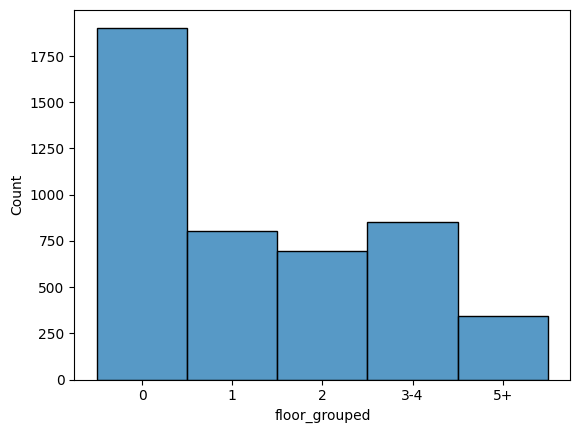

In [9]:

sns.histplot(data=df_clean,x="floor_grouped")
plt.show()


In [10]:
df_clean.isna().sum()

index                        0
propertyCode                 0
thumbnail                   33
externalReference          628
numPhotos                    0
floor                      398
price                        0
priceInfo                    0
propertyType                 0
operation                    0
size                         0
exterior                   419
rooms                        0
bathrooms                    0
address                      0
province                     0
municipality                 0
district                   953
country                      0
latitude                     0
longitude                    0
showAddress                  0
url                          0
description                 16
hasVideo                     0
status                      32
newDevelopment               0
hasLift                   1147
priceByArea                  0
change                       0
detailedType                 0
suggestedTexts               0
hasPlan 